<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L1_Multiclass_Classification_Example_with_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model accuracy: 0.98 or 97.7%

Some example predictions:
Example 1: Actual class = 1, Predicted class = 1
Example 2: Actual class = 3, Predicted class = 3
Example 3: Actual class = 2, Predicted class = 2
Example 4: Actual class = 1, Predicted class = 1
Example 5: Actual class = 0, Predicted class = 0

Probability estimates for the first 5 test examples:
Example 1: [7.84841677e-03 9.92151569e-01 1.22641909e-08 1.75394826e-09]
  Most likely class: 1 with 99.2% confidence
Example 2: [2.57857910e-02 5.44785470e-08 1.26905064e-05 9.74201464e-01]
  Most likely class: 3 with 97.4% confidence
Example 3: [3.86275535e-11 2.10333632e-06 9.99997874e-01 2.31102448e-08]
  Most likely class: 2 with 100.0% confidence
Example 4: [6.51687989e-05 9.99930605e-01 4.22578752e-06 5.53117004e-10]
  Most likely class: 1 with 100.0% confidence
Example 5: [9.99635777e-01 3.45021411e-04 2.87866339e-10 1.92010962e-05]
  Most likely class: 0 with 100.0% confidence


<Figure size 1200x1000 with 0 Axes>

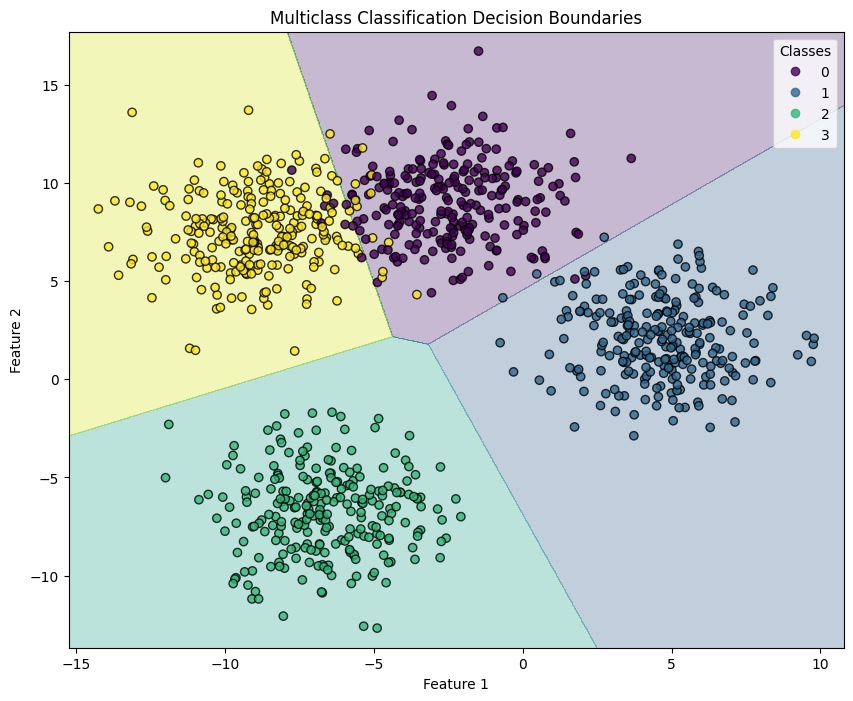

In [1]:
# Multiclass Classification Example with Scikit-learn
# This code demonstrates how to implement a simple multiclass classifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Create a synthetic dataset with 4 classes
# Think of this like creating artificial data points for our example
X, y = make_blobs(n_samples=1000, centers=4, random_state=42, cluster_std=2.0)

# 2. Split the data into training and testing sets
# Like dividing flashcards into ones to study from and ones to test yourself with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a multiclass logistic regression model (uses softmax internally)
# This is like teaching the computer to recognize the patterns
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# 4. Evaluate the model
# Let's see how well our computer learned
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f} or {accuracy*100:.1f}%")

# 5. Make predictions on test data
# Now the computer tries to guess on its own
y_pred = model.predict(X_test)

# 6. For a few examples, show the actual vs predicted class
print("\nSome example predictions:")
for i in range(5):
    print(f"Example {i+1}: Actual class = {y_test[i]}, Predicted class = {y_pred[i]}")

# 7. Get probability estimates for each class
# This shows how confident the model is about each possible answer
probs = model.predict_proba(X_test[:5])
print("\nProbability estimates for the first 5 test examples:")
for i in range(5):
    print(f"Example {i+1}: {probs[i]}")
    print(f"  Most likely class: {np.argmax(probs[i])} with {max(probs[i])*100:.1f}% confidence")

# 8. Visualize the decision boundaries
# Let's see how the computer divides up the data
def plot_decision_boundaries(X, y, model, ax=None):
    # Set up mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and training points
    if ax is None:
        plt.figure(figsize=(10, 8))
        ax = plt.gca()

    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', alpha=0.8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Multiclass Classification Decision Boundaries')
    ax.legend(*scatter.legend_elements(), title="Classes")
    return ax

plt.figure(figsize=(12, 10))
plot_decision_boundaries(X, y, model)
plt.show()
